# End to End Multi-class Dog Breed Classification problem overview

## 1. Problem

Identifying the breed of a dog given an image of a dog.

when i'm sitting at the cafe and i take a photo of a dog,  I want to know what breed of dog it is.

## 2. Data

The data we're using is from kaggle's dog breed classification.

# https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

# https://www.kaggle.com/c/dog-breed-identification/overview

## 4. Features

Some information about the data:
* We're dealing with image (unstructured data) it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 differenct classes).
* There are around 10,000+ imges in the training set
(these images have labels).
* There are around 10,000+ imges in the test set
(these images have no labels, because we'll want to predict them.)



In [2]:
 # !unzip "/content/drive/MyDrive/DogVision/ dog-breed-identification.zip" -d "drive/MyDrive/DogVision/"

In [3]:
# pip install tensorflow

In [4]:
# !unzip "C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification.zip" -d ""C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/""

In [5]:
# import zipfile
# import os

# zip_path = "C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification.zip"
# extract_to = "C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/"

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print("Unzipping complete!")

## Get our Workspace ready

In [7]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")


TF version: 2.17.0
Hub version: 0.16.1
GPU not available :(


In [8]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

## Getting our data Ready (turning into Tensors)
With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first.(numerical representataions).

Let's start by accessing our data and checking out the lables.

In [10]:
# Checkout the labels of our data
import pandas as pd
# labels_csv = pd.read_csv("drive/MyDrive/DogVision/labels.csv")
labels_csv = pd.read_csv(r"C:\Users\Hi\Documents\Machine Learning\Machine Learning Project\DogVision\dog-breed-identification\labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [11]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [12]:
# How many images are there of each breed >
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

<Axes: xlabel='breed'>

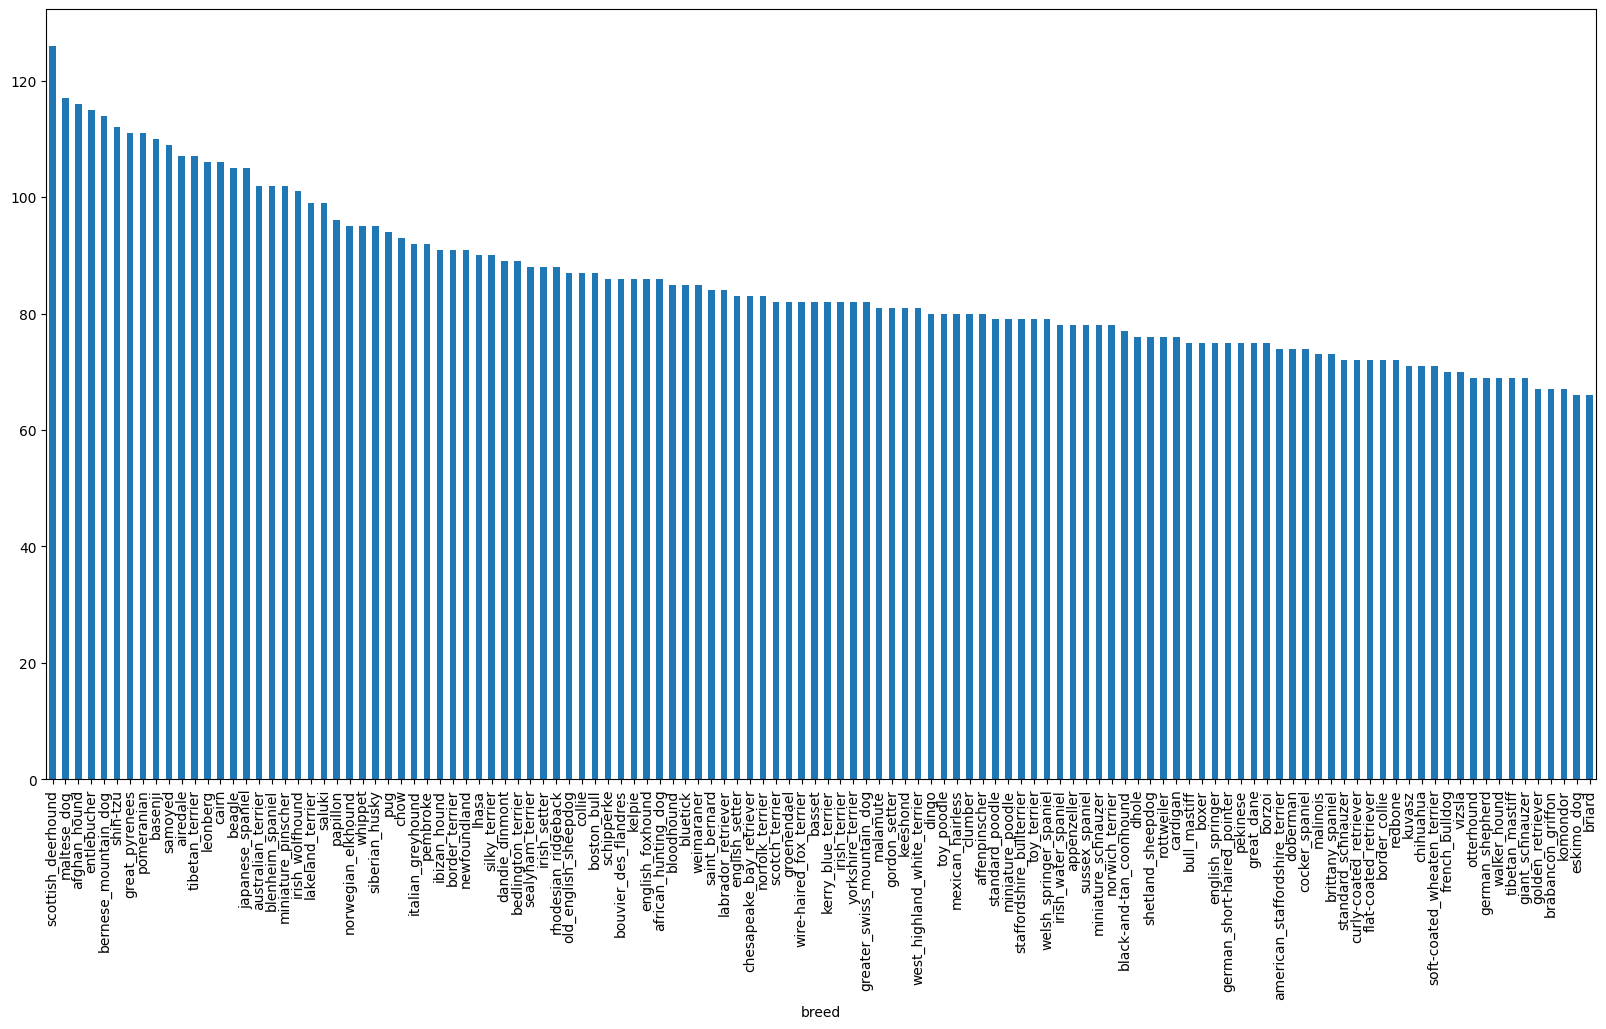

In [13]:
# How many images are there of each breed ?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [14]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [15]:
labels_csv["breed"].value_counts().median()
# 82 images per class

82.0

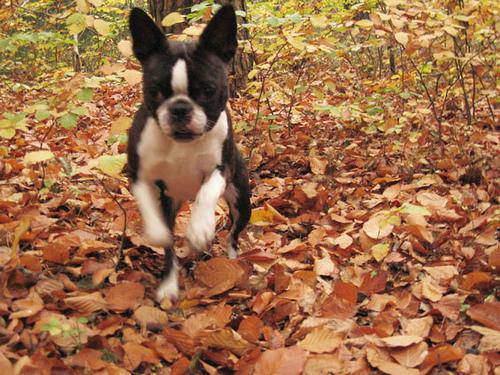

In [16]:
# Let's view an image
from IPython.display import Image
# Image("/content/drive/MyDrive/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")
Image(r"C:\Users\Hi\Documents\Machine Learning\Machine Learning Project\DogVision\dog-breed-identification\train\000bec180eb18c7604dcecc8fe0dba07.jpg")

## Getting Images and their labels

### Let's get a list of all of our image file path names

In [19]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [20]:
# Create pathnames from image ID's
# filenames = []

filenames = ["C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/"+ fname+ ".jpg" for fname in labels_csv["id"]]
# Check the first 10
filenames[:10]

['C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/00290d3e1fdd27226

In [21]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/")) == len(filenames):
# if len(os.listdir("drive/My Drive/DogVision/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! proceed.")

else:
  print("Filenames do not match with actual amount of files, check the target directory.")

Filenames match actual amount of files!!! proceed.


In [22]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [24]:
import numpy as np
labels = labels_csv["breed"]
labels

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [25]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [26]:
len(labels)

10222

In [27]:
labels_csv["breed"]

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [28]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels) # does same thing as above function
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [29]:
len(labels)

10222

In [30]:
labels = labels_csv["breed"]
labels

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [31]:
# see if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [32]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [33]:
len(unique_breeds)

120

In [34]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [35]:
len(labels)

10222

In [36]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [37]:
len(boolean_labels)

10222

In [38]:
# How to convert Boolean arrays into numbers
# Example: Turning Boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax())  #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where sample label occurs

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [39]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [40]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [41]:
filenames[:10]

['C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/00290d3e1fdd27226

### Creating my own validation set
Since the dataset from kaggle doesn't come with a
validation set, we're going to create our own.

In [43]:
# Setup X and y variables
X = filenames
y = boolean_labels

In [44]:
len(filenames)

10222

we're going to start off experiementing with ~1000 images and increase as needed

In [46]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param (type:"slider", min:1000, max=10000, step:1000)

In [47]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [48]:
# Let's have a geez at the training data
X_train[:5], y_train[:5]

(['C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, Fals

### Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable,
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shape of (224, 224)
5. Return the modified `image`

Before we do, let's see what importing an image looks like.

In [50]:
# Convert image to Numpy
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [51]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [52]:
image.max(), image.min()

(255, 0)

In [53]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [54]:
# turn image into tensors
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable,
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`


In [56]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired values (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [57]:
# tensor = tf.io.read_file(filenames[26])
# tensor

In [58]:
# tensor = tf.image.decode_jpeg(tensor, channels=3)
# tensor

In [59]:
# tf.image.convert_image_dtype(tensor, tf.float32) #convert the range 0 to 255 -> 0 to 1

## Turning our data into batches

why turn our data into batches ?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need to be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this:
`(image, label)`.

In [61]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [62]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X` & `y`) into batches!

In [64]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data our of image (X) and (y) label pairs.
  shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [65]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [66]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches
our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [68]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data Batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))

  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplotes(5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [69]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [70]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

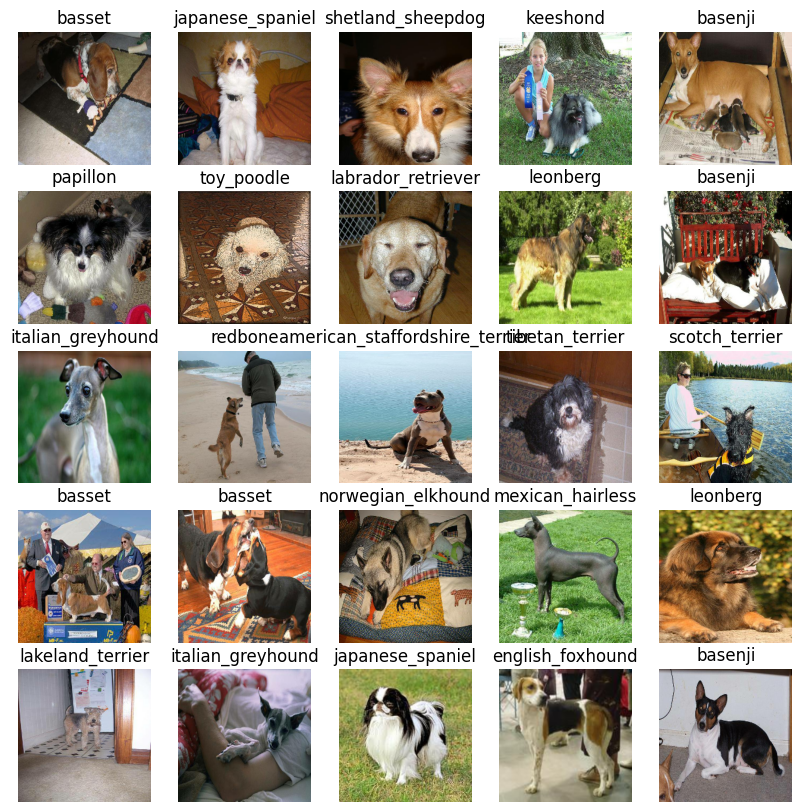

In [71]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

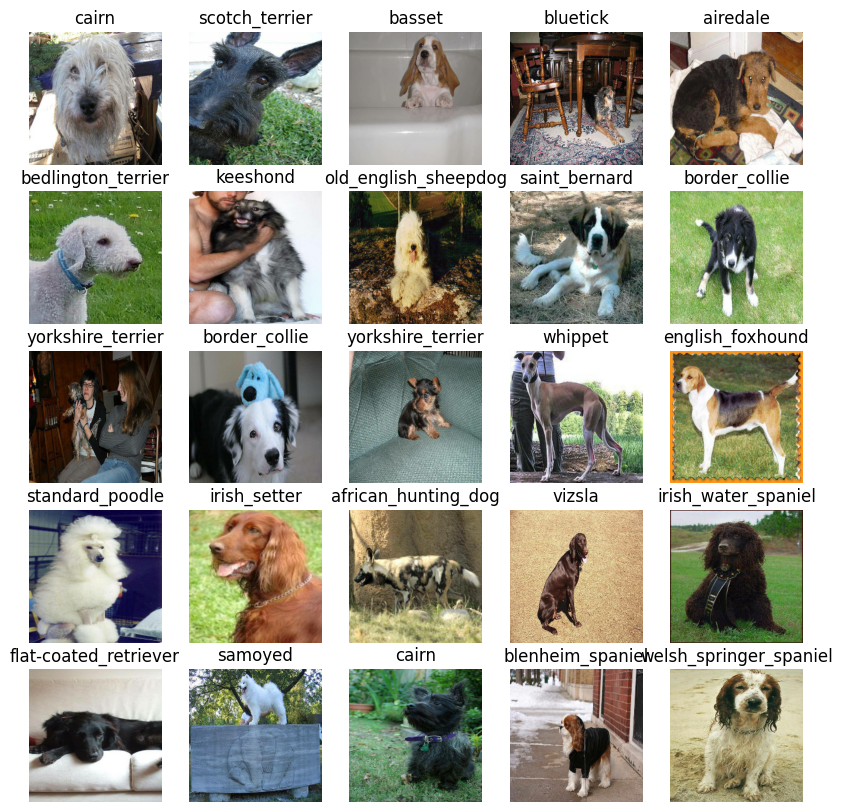

In [72]:
# Now let' visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [73]:
# unique_breeds[y[0].argmax()]

In [74]:
# unique_breeds

## Building a model

Before we build a model, there are few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from tensorflowhub.com moved the models to kaggle - https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2

In [76]:
IMG_SIZE

224

In [77]:
# import tensorflow_hub as hub
# # Setup input shape to the model
# INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# # Setup output shape of our model
# OUTPUT_SHAPE = len(unique_breeds) # Number of unique labels

# # Setup model URL from TensorFlow Hub
# MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


In [78]:
# INPUT_SHAPE

Now we've got our inputs, outputs and model ready to go. Let's put them together into keras deep learning model! knowing this, let's create a function which:
 * Takes the input shape and the model we've chosen as parameters.
 * Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
 * Complies the model (says it should be evaluated and improved).
 * Builds the model (tells the model the input shape it will be getting).
 * Returns the model.

All of these steps can be found here:  https://www.tensorflow.org/guide/keras

In [80]:
import tf_keras as keras

In [81]:
# # Create a function which builds a keras model
# def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
#   print("Building model with:", MODEL_URL)

#   # Setup the model layers
#   model = tf.keras.Sequential([
#       hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
#       tf.keras.layers.Dense(units=OUTPUT_SHAPE,
#                             activation="softmax") # Layer 2 [output layer]
#   ])

#   # Compile the model
#   model.compile(
#       loss=tf.keras.losses.CategoricalCrossentropy(), # oUR MODEL WANTS TO REDUCE THIS (How wrong its guesses are)
#       optimizer = tf.keras.optimizers.Adam(), # A friend telling our model how to improve it's guesses
#       metrics=["accuracy"] # We'd like this to go up
#   )

#   # Build the model
#   model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

#   return model

# # Build and summarize the model
# model = create_model()
# model.summary()

i want to try a new model URL because the above function returned a different figure to the dense layer in the function.

In [83]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, color channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [84]:
pip install tf_keras

Note: you may need to restart the kernel to use updated packages.


In [85]:
import tf_keras
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("building model with:", MODEL_URL)

  # Setup the model layers
  model = keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      keras.layers.Dense(units=OUTPUT_SHAPE,
                         activation="softmax") # Layer 2 (outputlayer)
  ])

  # Compile the model.compile(
  model.compile(
      loss=keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this ( how wrong it's guesses are) Binary Crossentropy for Binary classification , Categorical Crossentrophy for Multi-class classification
      optimizer = keras.optimizers.Adam(), # A friend telling out model how to improve its guesses
      metrics = ["accuracy"]  # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let's the model know what kind of inputs it'll be getting

  return model

In [86]:
# Create a model and checkt it's details
model = create_model()
model.summary()

building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [87]:
outputs = np.ones(shape=(1, 1, 1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

## Creating callbacks

callbacks are helper functions a model can use during trainng to do such things as save it progress, check it's progress or stop trainint early if a model stops improving.

we'll create two callbacks, one for TensorBoard which helps track our model progress and another for early stopping which prevents our model from trianing for too long.


### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension. ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our models `fit()` function.✅
3. Visualize our models training logs with the `%tensorboard` magic functions (we'll do this after model training).

In [89]:
# Load TensorBoard notebook extension
import os
os.makedirs("C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/logs", exist_ok=True)  # Create a log directory
%load_ext tensorboard

In [90]:
import os
import datetime
from tf_keras.callbacks import TensorBoard

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing Tensorboard logs with a timestamp
  logdir = os.path.join("C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  # Return a TensorBoard callback that saves logs to this directory
  return TensorBoard(log_dir=logdir)


### Early stopping call back
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [92]:
# Create early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                               patience=3,
                                               min_delta=0.01,
                                               restore_best_weights=True
                                              )

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [94]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}
print(f"Training for {NUM_EPOCHS} epochs")


Training for 100 epochs


In [95]:
# pip install ipywidgets

In [96]:
import ipywidgets as widgets
from IPython.display import display 

epoch_slider = widgets.IntSlider(value=100, min=10, max=100, step=10, description='Epochs:')
display(epoch_slider)

IntSlider(value=100, description='Epochs:', min=10, step=10)

In [97]:
NUM_EPOCHS = epoch_slider.value
print(f"Training for {NUM_EPOCHS} epochs")


Training for 100 epochs


In [98]:
# NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}
## it is not working in jupyter notebook

In [99]:
# Check to make sure we're still running on a GPU
print("GPU", "availabale (YESS!!!)" if tf.config.list_physical_devices("GPU") else "not available" )

GPU not available


Let's create a function which trains a model.

* Create a model using create_model()
* Setup a TensorBoard callback using create_tensorboard_callback()
* Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_Epochs) and the callbacks we'd like to use.
* Return the model.

In [101]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """

  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping]) # Removed early_stopping callback

  # Return the fitted model
  return model

In [102]:
# Fit the model to the data
model = train_model()

building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100



25/25 [==============================] - 26s 830ms/step - loss: 4.5767 - accuracy: 0.1125 - val_loss: 3.4905 - val_accuracy: 0.2700
Epoch 2/100
25/25 [==============================] - 18s 744ms/step - loss: 1.6580 - accuracy: 0.6988 - val_loss: 2.1531 - val_accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - 17s 701ms/step - loss: 0.5767 - accuracy: 0.9425 - val_loss: 1.6416 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 18s 707ms/step - loss: 0.2587 - accuracy: 0.9875 - val_loss: 1.4650 - val_accuracy: 0.6400
Epoch 5/100
25/25 [==============================] - 15s 621ms/step - loss: 0.1486 - accuracy: 0.9937 - val_loss: 1.3655 - val_accuracy: 0.6550
Epoch 6/100
25/25 [==============================] - 16s 634ms/step - loss: 0.1023 - accuracy: 0.9987 - val_loss: 1.3295 - val_accuracy: 0.6700
Epoch 7/100
25/25 [==============================] - 17s 696ms/step - loss: 0.0765 - accuracy: 1.0000 - val_loss: 1.3003 - val_accuracy: 0.6750
Epoc

**Question:** It looks like our model is overfitting because it's performing far better on the training dataset than the validation dataset, what are some ways to prevent model overfitting in deep learning neural networks?

**Note:** Overfittig to begin with is a good thing! It means our model is learning!!!

### Checking the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its contents.

In [105]:
!kill 28288

kill: 28288: No such process


In [106]:
%reload_ext tensorboard
%tensorboard --logdir "C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/logs" --port 6006

Reusing TensorBoard on port 6006 (pid 3576), started 17:01:16 ago. (Use '!kill 3576' to kill it.)

## Making and Evaluating predictions usinga trained model

In [108]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [109]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 3s 379ms/step


array([[8.8793703e-04, 2.8635579e-04, 2.8355743e-04, ..., 5.1138800e-04,
        4.7658839e-05, 3.1332832e-03],
       [6.0575141e-04, 5.5431295e-04, 5.0782328e-03, ..., 2.4098346e-04,
        7.6791039e-04, 6.3356286e-04],
       [1.3893149e-05, 8.1986742e-05, 6.4618485e-05, ..., 1.9289234e-04,
        1.9393758e-05, 4.1408019e-04],
       ...,
       [2.4103060e-06, 5.0027906e-05, 2.7615059e-04, ..., 9.4483648e-06,
        4.2135118e-05, 3.7861054e-04],
       [2.2374499e-03, 4.1835304e-04, 3.5445025e-04, ..., 5.7874585e-04,
        3.3545697e-05, 2.6900345e-02],
       [4.1385117e-04, 1.9393631e-04, 4.9824798e-03, ..., 1.1011723e-03,
        8.3563980e-03, 1.0450505e-05]], dtype=float32)

In [110]:
predictions[0]

array([8.87937029e-04, 2.86355789e-04, 2.83557427e-04, 8.09330522e-05,
       3.61358892e-04, 1.17791438e-04, 3.49156931e-02, 4.38231975e-04,
       8.30821518e-04, 7.83522904e-04, 1.04419899e-03, 2.56032217e-04,
       9.81386052e-04, 1.44013728e-04, 1.12680288e-03, 1.89980710e-04,
       1.28846470e-04, 1.45103887e-01, 2.91094293e-05, 4.56277485e-04,
       5.92237292e-03, 1.46541744e-04, 7.14490307e-05, 1.81189843e-03,
       9.50996255e-05, 1.54400404e-05, 1.33042976e-01, 4.67911741e-05,
       2.05520098e-03, 1.87045240e-04, 4.15930670e-04, 1.88168616e-03,
       5.55665523e-04, 4.98902809e-05, 2.06560464e-04, 2.73329914e-02,
       8.48956552e-05, 4.38299830e-05, 6.39669233e-05, 1.25092716e-04,
       5.57993597e-04, 1.91652347e-04, 2.88290350e-04, 7.78048707e-05,
       2.98102277e-05, 4.63171891e-05, 1.61547650e-05, 2.02199066e-04,
       1.66406226e-03, 3.51679744e-04, 4.58047580e-04, 2.82382738e-04,
       2.19873746e-05, 7.06370993e-05, 1.87493686e-04, 8.40682187e-05,
      

In [111]:
len(predictions[0])

120

In [112]:
np.sum(predictions[0])

0.9999999

In [113]:
np.sum(predictions[1])

1.0

In [114]:
predictions.shape

(200, 120)

In [115]:
len(y_val)

200

In [116]:
len(unique_breeds)

120

In [117]:
# First Prediction
index = 0
print(predictions[index])
print(f"Max value (probability of preidction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[8.87937029e-04 2.86355789e-04 2.83557427e-04 8.09330522e-05
 3.61358892e-04 1.17791438e-04 3.49156931e-02 4.38231975e-04
 8.30821518e-04 7.83522904e-04 1.04419899e-03 2.56032217e-04
 9.81386052e-04 1.44013728e-04 1.12680288e-03 1.89980710e-04
 1.28846470e-04 1.45103887e-01 2.91094293e-05 4.56277485e-04
 5.92237292e-03 1.46541744e-04 7.14490307e-05 1.81189843e-03
 9.50996255e-05 1.54400404e-05 1.33042976e-01 4.67911741e-05
 2.05520098e-03 1.87045240e-04 4.15930670e-04 1.88168616e-03
 5.55665523e-04 4.98902809e-05 2.06560464e-04 2.73329914e-02
 8.48956552e-05 4.38299830e-05 6.39669233e-05 1.25092716e-04
 5.57993597e-04 1.91652347e-04 2.88290350e-04 7.78048707e-05
 2.98102277e-05 4.63171891e-05 1.61547650e-05 2.02199066e-04
 1.66406226e-03 3.51679744e-04 4.58047580e-04 2.82382738e-04
 2.19873746e-05 7.06370993e-05 1.87493686e-04 8.40682187e-05
 2.12774190e-04 2.08243709e-02 3.23303189e-04 4.17631306e-02
 2.38176915e-04 1.35113733e-04 1.87860662e-03 3.74485353e-05
 3.46405338e-03 1.162470

In [118]:
# First Prediction
index = 42
print(predictions[index])
print(f"Max value (probability of preidction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.57137227e-04 2.07398421e-04 3.46045636e-05 5.26793301e-05
 4.16610530e-03 3.54665281e-05 2.04950789e-04 9.10483184e-04
 9.69496928e-03 1.27382446e-02 1.31801353e-05 2.28532299e-05
 4.01019555e-04 3.00915283e-03 1.40463200e-03 2.31009047e-03
 6.56345510e-05 1.83348689e-04 3.67385044e-04 6.41095976e-04
 1.46354823e-05 1.60164665e-04 1.85372017e-04 4.57210408e-05
 1.26781166e-02 3.25756759e-04 2.37241387e-04 2.27875018e-04
 9.91833513e-04 6.41928054e-05 4.97360656e-04 2.25815296e-04
 3.88971413e-04 1.47304992e-04 3.42975327e-05 5.62378882e-05
 3.37184931e-04 1.70303145e-04 1.41227734e-04 3.47537875e-01
 2.16302142e-04 4.64089026e-05 7.92300422e-03 6.57782039e-06
 4.60352458e-04 3.64996813e-05 6.24346896e-04 2.10147467e-04
 1.98359441e-04 1.87062848e-04 1.63334698e-04 1.82349497e-04
 9.42284940e-04 2.77494011e-03 1.72275704e-05 3.55261785e-04
 2.46717420e-04 6.54130272e-05 1.40887671e-04 4.69286460e-05
 1.29151842e-04 7.79947790e-04 5.62508685e-05 1.11908972e-04
 2.87169445e-04 2.386803

In [119]:
unique_breeds[113]

'walker_hound'

Having the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on.

**Note** Prediction probabilities are also known as functions as confidence levels.

In [121]:
## Turn predictions probabilities into their respective label (easier to understand)

def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'

In [122]:
## Turn predictions probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'irish_setter'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels(truth labels).

In [124]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [125]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    # labels.append(label)
    labels.append(unique_breeds[np.argmax(label)])
      
  return images, labels
# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [126]:
# get_pred_label(val_labels[0])

In [127]:
# images_ = []
# labels_ = []

# # loop through unbatched data
# for image, label in val_data.unbatch().as_numpy_iterator():
#   images_.append(image)
#   labels_.append(label)

# images_[0], labels_[0]

In [128]:
# get_pred_label(labels_[0])

In [129]:
# get_pred_label(predictions[0])

Now we've got ways to get:
  * Prediction labels
  * Validation labels (truth labels)
  * Validation Images

Let's make some function to make these all a bit more visualize.

We'll create a function which:
* Takes an array of prediction probabilties, an array of truth labels and an array of images and an integers.✅
* Convert the prediction probabilties to a predicted label.✅
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.✅

In [131]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                     np.max(pred_prob)*100,
                                     true_label),
                                     color=color)

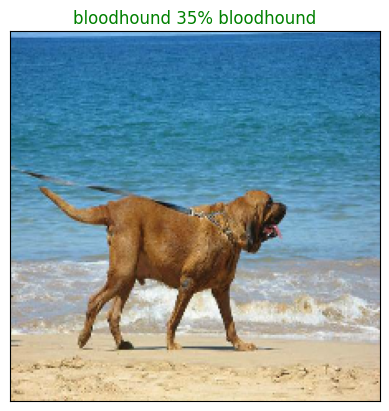

In [132]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=100)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:
* Take an input of prediction probabilities array and a ground truth arrya and an integer.✅
* Find the predicted label using `get_pred_label()`✅
* Find the top 10:
  * Prediction probabilities indexes✅
  * Prediction probabilities values✅
  * Prediciton labels✅
* Plot the top 10 prediction probability values and labels, coloring the true label green.✅

In [134]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

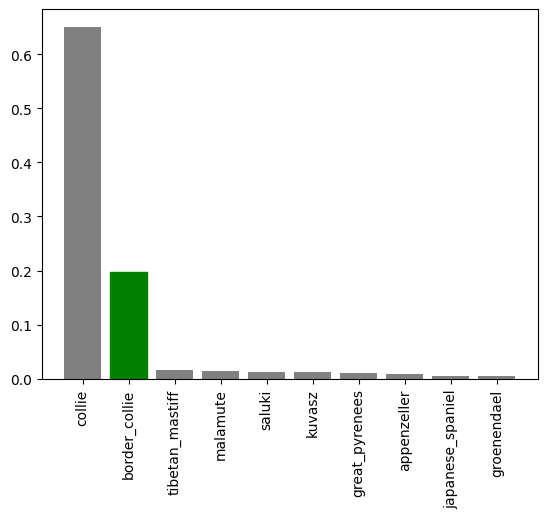

In [135]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

In [136]:
# predictions[0]

In [137]:
# predictions[0][predictions[0].argsort()[-10:][::-1]]

In [138]:
# unique_breeds[predictions[0].argsort()[-10:][::-1]]

In [139]:
# predictions[0].max

Now we've got some funciton to help use visualize our predictions and evaluate our module, let's check out few.

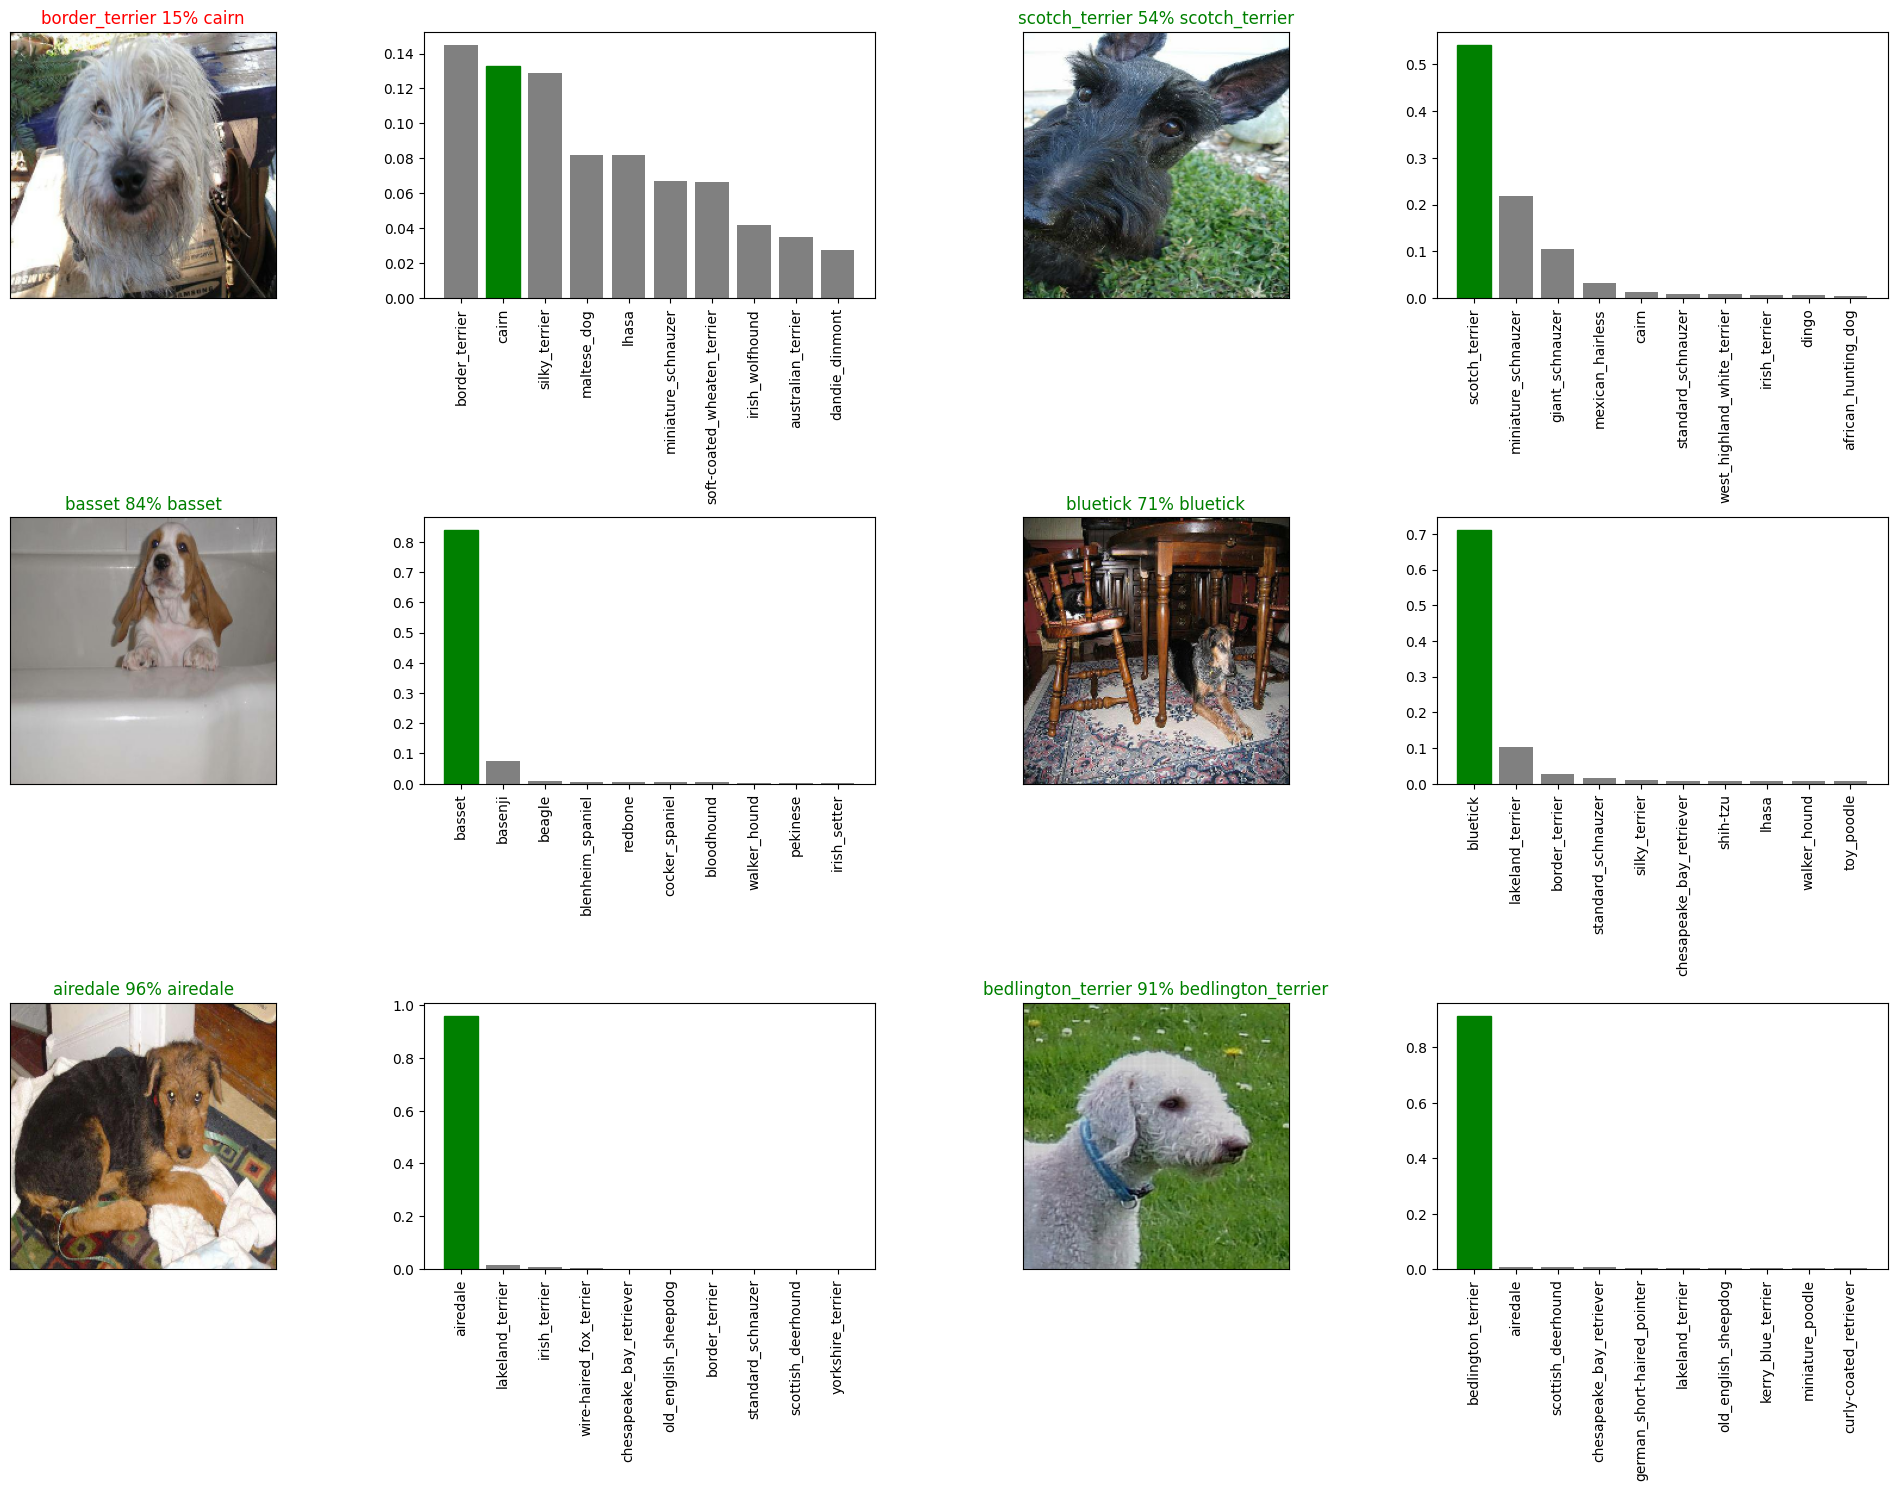

In [141]:
 # Let's  check out a few predictions and their different values
 i_multiplier = 0
 num_rows = 3
 num_cols = 2
 num_images = num_rows*num_cols
 plt.figure(figsize=(10*num_cols, 5*num_rows))

 for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
                 labels = val_labels,
                 images = val_images,
                 n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

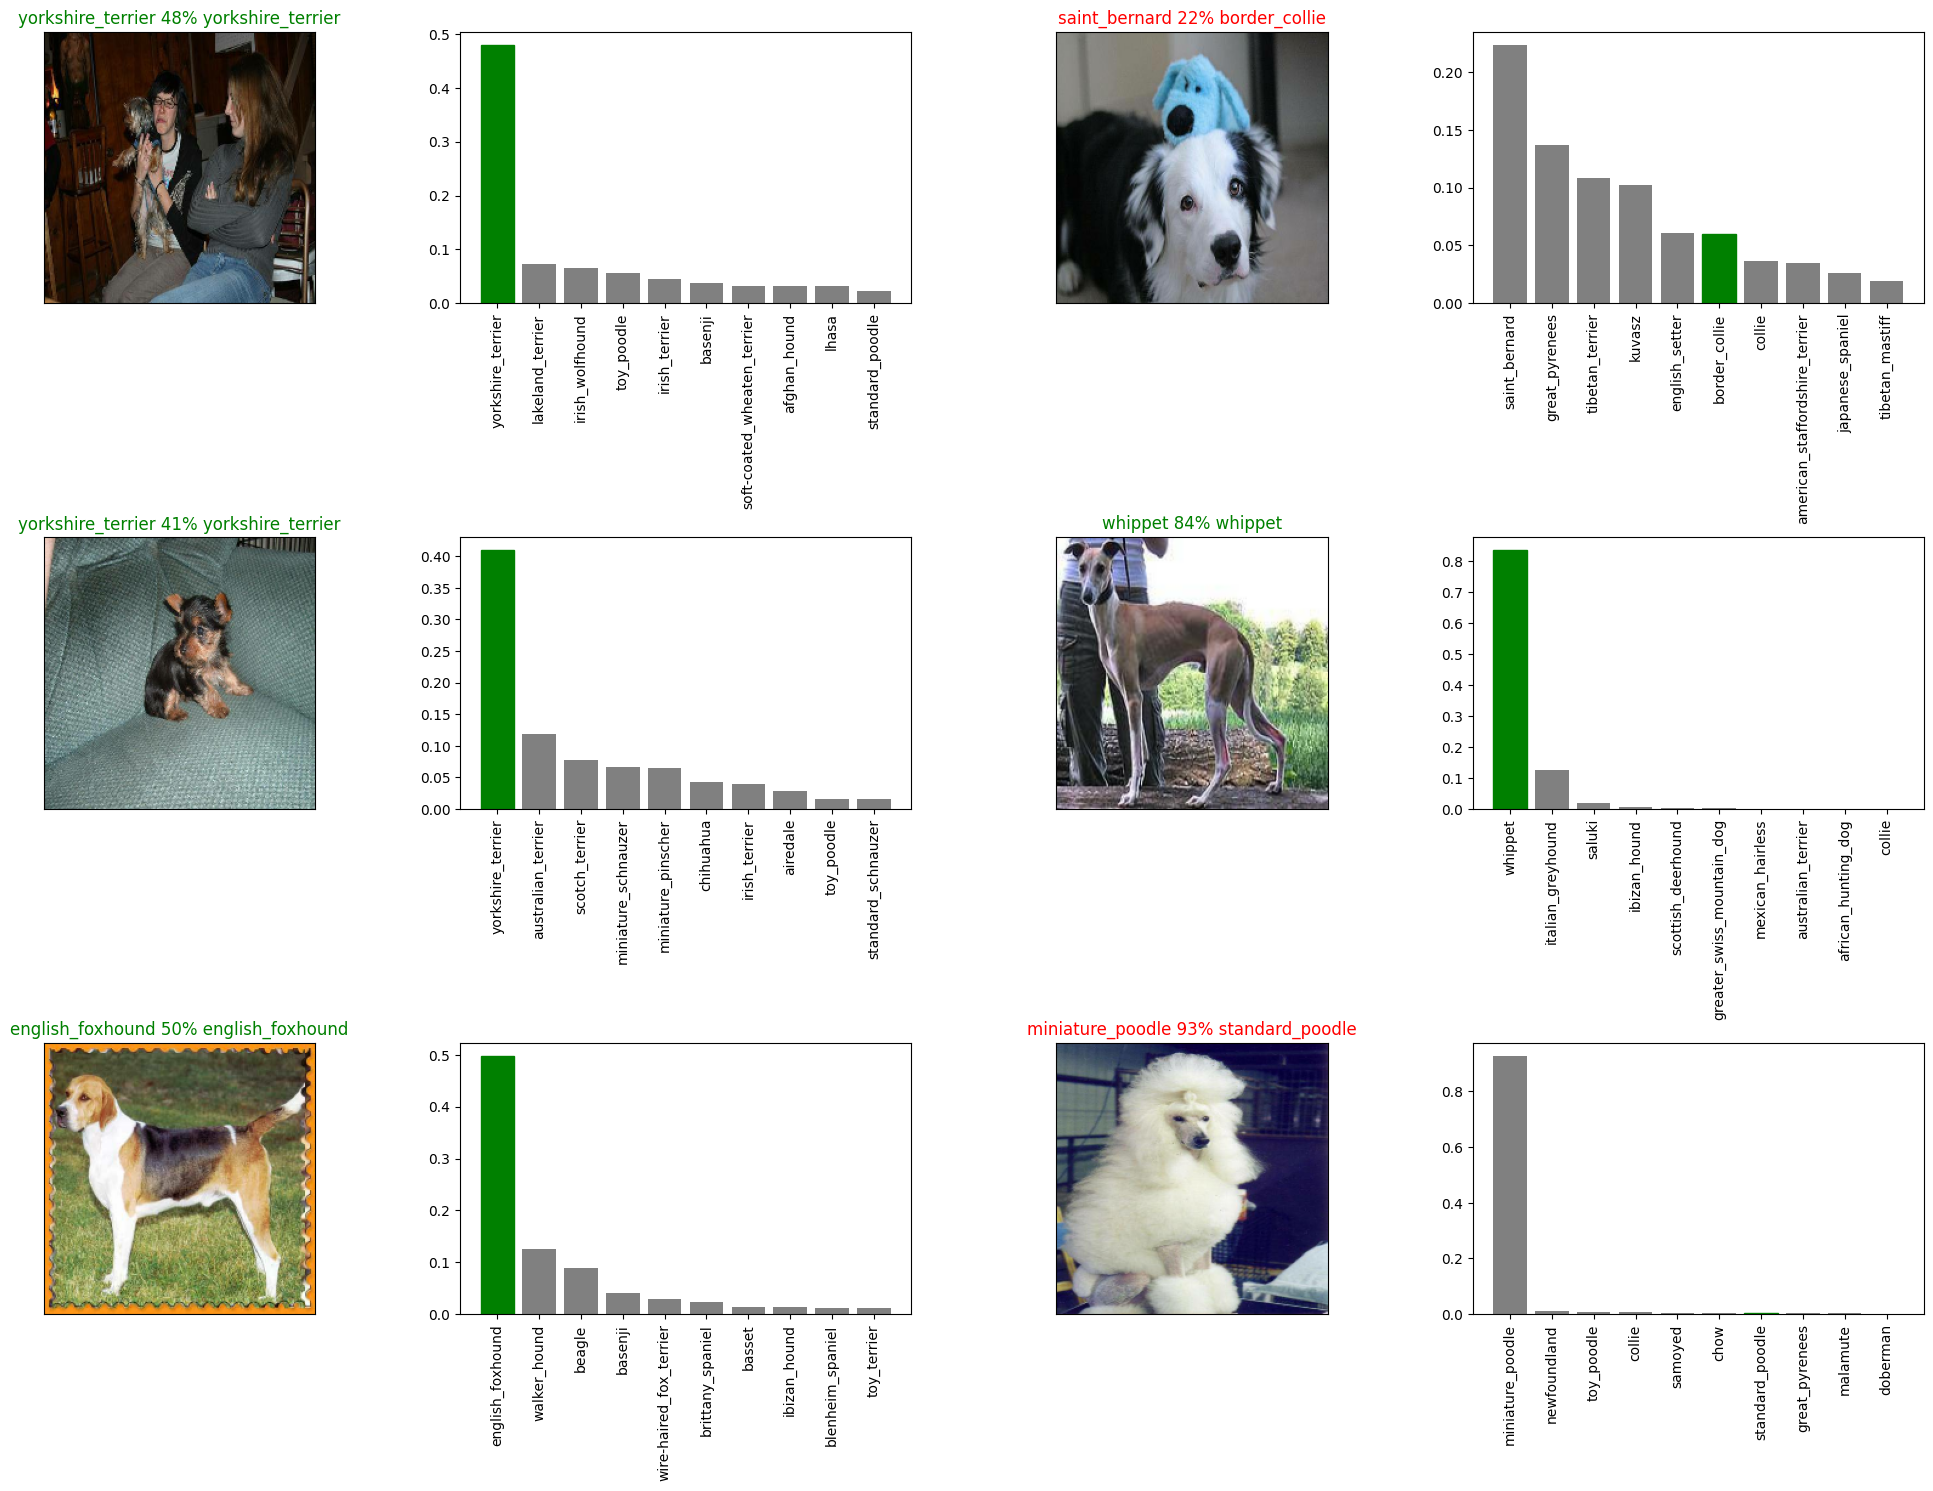

In [142]:
 # Let's  check out a few predictions and their different values
 i_multiplier = 10
 num_rows = 3
 num_cols = 2
 num_images = num_rows*num_cols
 plt.figure(figsize=(10*num_cols, 5*num_rows))
 for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels = val_labels,
            images = val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

**Challenge:** How would you create a confusion matrix with out models predictions and true labels ?

## Saving and reloading a trained model

In [145]:
# # Create a function to save a trained model
# def save_model(model, suffix=None):
#     """
#     Saves a given model in a model's directory and appends a suffix (string).
#     """
#     # crate a model directory pathname with current time
#     modeldir = os.path.join("/kaggle/working/models",
#                            datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
#     model_path = modeldir + "-" + suffix + ".keras" # Save format of model
#     print(f"Saving model to: {model_path}...")
#     model.save(model_path)
#     return model_path


# Create a function to save a trained model
def save_model(model, suffix=None):
    """
    Saves a given model in a model's directory and appends a suffix (string).
    """
    # Define the model directory
    modeldir = os.path.join(r"C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/models")
    
    # Check if the directory exists, if not, create it
    if not os.path.exists(modeldir):
        os.makedirs(modeldir)

    # Create a unique model file path with timestamp and suffix
    model_path = os.path.join(modeldir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "-" + suffix + ".keras")
    
    # print(f"Saving model to: {model_path}...")
    print(f"Saving model to: {model_path.replace(os.sep, '/')}")
    model.save(model_path)
    return model_path

# Save the model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/models/20250619-154955-1000-images-mobilenetv2-Adam.keras


'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/models\\20250619-154955-1000-images-mobilenetv2-Adam.keras'

In [146]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we've got functions to save and load a trained model, let's make sure they work!

In [148]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/models/20250619-154956-1000-images-mobilenetv2-Adam.keras


'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/models\\20250619-154956-1000-images-mobilenetv2-Adam.keras'

In [149]:
# Load a trained model
# loaded_1000_image_model = load_model(r"C:\Users\Hi\Documents\Machine Learning\Machine Learning Project\DogVision\models\20250618-202946-1000-images-mobilenetv2-Adam.keras")
loaded_1000_image_model = load_model(r"C:\Users\Hi\Documents\Machine Learning\Machine Learning Project\DogVision\models\20250618-230318-1000-images-mobilenetv2-Adam.keras")

Loading saved model from: C:\Users\Hi\Documents\Machine Learning\Machine Learning Project\DogVision\models\20250618-230318-1000-images-mobilenetv2-Adam.keras


In [150]:
 # Evaluate the pre-saved model
 model.evaluate(val_data)

7/7 [==============================] - 3s 379ms/step - loss: 1.2784 - accuracy: 0.6850


[1.2783820629119873, 0.6850000023841858]

In [151]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 4s 373ms/step - loss: 1.3159 - accuracy: 0.6950


[1.315885066986084, 0.6949999928474426]

In [152]:
## Training a big dod model (on the full data)
len(X), len(y)

(10222, 10222)

In [153]:
X[:10]

['C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/00290d3e1fdd27226

In [154]:
X_train[:10]

['C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/0ea5759640f2e1c2d1a06adaf8a54ca7.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/dog-breed-identification/train/03e1d2ee5fd90aef0

In [155]:
len(X_train)

800

In [156]:
y[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [157]:
# Create a data batch with the full data set
full_data = create_data_batches(X,y)

Creating training data batches...


In [158]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [159]:
# Create a model for full_model 
full_model = create_model()

building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [160]:
# Create a full_model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = keras.callbacks.EarlyStopping(monitor="accuracy", 
                                                          patience = 2,
                                                          min_delta=0.01,
                                                          restore_best_weights=True)

Note: Running the cell below will take a little while because the GPU has to load all the images into memory.

In [162]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 141s 429ms/step - loss: 1.3319 - accuracy: 0.6730
Epoch 2/100
320/320 [==============================] - 154s 482ms/step - loss: 0.4048 - accuracy: 0.8819
Epoch 3/100
320/320 [==============================] - 171s 534ms/step - loss: 0.2371 - accuracy: 0.9354
Epoch 4/100
320/320 [==============================] - 147s 457ms/step - loss: 0.1525 - accuracy: 0.9651
Epoch 5/100
320/320 [==============================] - 141s 441ms/step - loss: 0.1071 - accuracy: 0.9779
Epoch 6/100
320/320 [==============================] - 148s 463ms/step - loss: 0.0768 - accuracy: 0.9871
Epoch 7/100
320/320 [==============================] - 188s 589ms/step - loss: 0.0576 - accuracy: 0.9914
Epoch 8/100
320/320 [==============================] - 190s 593ms/step - loss: 0.0452 - accuracy: 0.9946
Epoch 9/100
320/320 [==============================] - 197s 615ms/step - loss: 0.0375 - accuracy: 0.9967


In [163]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/models/20250619-161445-full-image-set-mobilenetv2-Adam.keras


'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/models\\20250619-161445-full-image-set-mobilenetv2-Adam.keras'

In [164]:
# Load in the full model 
loaded_full_model = load_model(r"C:\Users\Hi\Documents\Machine Learning\Machine Learning Project\DogVision\models\20250619-000435-full-image-set-mobilenetv2-Adam.keras")

Loading saved model from: C:\Users\Hi\Documents\Machine Learning\Machine Learning Project\DogVision\models\20250619-000435-full-image-set-mobilenetv2-Adam.keras


## Making predictions on the test dataset
Since the model was trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily, we created **create_data_batches()** which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames.
* Convert the filenames into test data batches using **create_data_batches()** and setting the test_data prameter to **True** (since the test data doesn't have labels).
* Make a predictions array by passing the test batches to the predict() method called on our model.

In [166]:
# Load test image filenames
test_path = r"C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/test/"
test_filename = [test_path + fname for fname in os.listdir(test_path)]
test_filename[:10]

['C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/test/000621fb3cbb32d8935728e48679680e.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/test/00102ee9d8eb90812350685311fe5890.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'C:/Users/Hi/Documents/Machine Learning

In [167]:
len(test_filename)

10357

In [168]:
# Create test data batch
test_data = create_data_batches(test_filename, test_data=True)

Creating test data batches...


In [169]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

Note: calling **predict()** function on the full model and passing it the test data batch will take a long time to run. 

In [171]:
# Make predicitons on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data, 
                                             verbose=1)

324/324 [==============================] - 201s 618ms/step


In [172]:
# Save predictions (Numpy Array) to csv file (for access later)
np.savetxt(r"C:\Users\Hi\Documents\Machine Learning\Machine Learning Project\DogVision\preds_array.csv", test_predictions, delimiter=",")

In [173]:
# Load predictions (Numpy Array) from csv file 
test_predictions = np.loadtxt(r"C:\Users\Hi\Documents\Machine Learning\Machine Learning Project\DogVision\preds_array.csv", delimiter=",")

In [174]:
test_predictions[:10]

array([[7.83790188e-09, 5.95193317e-09, 1.55232719e-11, ...,
        2.49129578e-10, 1.19594532e-07, 9.15994125e-09],
       [1.61337339e-05, 9.36829019e-06, 1.84821761e-06, ...,
        3.48042093e-08, 7.92959497e-07, 1.22020154e-07],
       [5.53274182e-09, 1.90582377e-05, 2.69864881e-06, ...,
        1.29129967e-05, 5.01049229e-08, 1.13495915e-08],
       ...,
       [1.24132839e-07, 1.84640800e-08, 1.04970880e-07, ...,
        4.12926981e-09, 1.23196553e-09, 2.20657146e-08],
       [1.88002014e-09, 8.78651392e-08, 1.26717730e-08, ...,
        1.24589969e-05, 1.22705717e-06, 1.64266567e-09],
       [4.27608526e-08, 1.33088411e-08, 7.53709273e-09, ...,
        1.08910617e-10, 3.85791310e-09, 8.26840164e-07]])

In [175]:
test_predictions.shape

(10357, 120)

## preparing test dataset predictions for Kaggle

Looking at the kaggle sample submission, we find that it wants our models predictions probability outputs in a DataFrame with an ID and a column for each different dog breed.
www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed
* Add data to the ID columns by extracting the test image ID's from their filepahts
* Add data (the prediciton probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [325]:
# ["id"]  + list(unique_breeds)

In [327]:
# Create a pandas DataFrame 
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [348]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
# test_ids
preds_df["id"] = test_ids

In [350]:
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [342]:
os.path.splitext(test_filename[0])

('C:/Users/Hi/Documents/Machine Learning/Machine Learning Project/DogVision/test/000621fb3cbb32d8935728e48679680e',
 '.jpg')

In [352]:
# Add the predicitons probabiltities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   7.837902e-09  5.951933e-09   
1  00102ee9d8eb90812350685311fe5890   1.613373e-05  9.368290e-06   
2  0012a730dfa437f5f3613fb75efcd4ce   5.532742e-09  1.905824e-05   
3  001510bc8570bbeee98c8d80c8a95ec1   1.499636e-05  6.880120e-06   
4  001a5f3114548acdefa3d4da05474c2e   2.688717e-04  4.419741e-05   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.552327e-11  8.095122e-11                    9.628040e-11   
1         1.848218e-06  4.148529e-07                    3.378847e-05   
2         2.698649e-06  1.176922e-08                    1.918089e-08   
3         4.050016e-05  1.524536e-04                    6.062450e-04   
4         2.923065e-07  5.532603e-08                    5.635862e-08   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  3.243641e-09        6.539316e-12  1.068589e-09  1.298766e-10  ...   
1  3.657264e-07        1.288045e-05  2.160304e-05  2.644767e-06  ...   
2  7.694432e-08        1.655730e-08  1.367636e-09  2.517480e-07  ...   
3  6.838287e-06        8.847089e-10  1.851083e-06  3.153972e-07  ...   
4  6.304103e-09        2.313826e-07  8.528431e-08  3.849841e-07  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  9.290584e-10  3.050747e-10  3.078598e-11  3.149592e-11  6.828735e-11   
1  1.082866e-06  4.437582e-06  4.316907e-07  1.931383e-05  1.769959e-06   
2  1.997998e-09  2.200558e-09  1.035969e-06  3.348655e-05  1.095872e-06   
3  4.057837e-05  9.626255e-08  4.108893e-05  1.577882e-06  6.590644e-06   
4  1.385848e-06  3.299417e-08  3.068592e-08  9.520501e-09  3.745868e-08   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            1.249725e-09                 1.296297e-09  2.491296e-10   
1            6.817805e-06                 7.648290e-04  3.480421e-08   
2            2.427199e-06                 3.289735e-09  1.291300e-05   
3            3.800000e-07                 3.481711e-12  4.756514e-03   
4            1.481827e-08                 1.239490e-08  4.206111e-07   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.195945e-07       9.159941e-09  
1             7.929595e-07       1.220202e-07  
2             5.010492e-08       1.134959e-08  
3             1.140411e-08       9.700895e-06  
4             4.459729e-08       1.236987e-06  

[5 rows x 121 columns]

In [356]:
# Save our predictions datafrmae to CSV for submission to Kaggle
preds_df.to_csv(r"C:\Users\Hi\Documents\Machine Learning\Machine Learning Project\DogVision\full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

### Making Predictions on Custom images

To make predictions on custom images, we'll:
* Get the filepaths of our own images.
* Trun the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's `predict()` method.
* Convert the prediction output probabilities to predictions labels.
* Compare the predicted labels to the custom images.

In [433]:
import os
## Get the custom image filepaths
custom_path = r"C:\Users\Hi\Documents\Machine Learning\Machine Learning Project\DogVision\my-dog-photos" + "\\"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

print(custom_image_paths)


['C:\\Users\\Hi\\Documents\\Machine Learning\\Machine Learning Project\\DogVision\\my-dog-photos\\dog 2.jpg', 'C:\\Users\\Hi\\Documents\\Machine Learning\\Machine Learning Project\\DogVision\\my-dog-photos\\dog 3.jpg', 'C:\\Users\\Hi\\Documents\\Machine Learning\\Machine Learning Project\\DogVision\\my-dog-photos\\dog 4.jpg', 'C:\\Users\\Hi\\Documents\\Machine Learning\\Machine Learning Project\\DogVision\\my-dog-photos\\dog 5.jpg', 'C:\\Users\\Hi\\Documents\\Machine Learning\\Machine Learning Project\\DogVision\\my-dog-photos\\dog1.jpg']


In [435]:
custom_image_paths

['C:\\Users\\Hi\\Documents\\Machine Learning\\Machine Learning Project\\DogVision\\my-dog-photos\\dog 2.jpg',
 'C:\\Users\\Hi\\Documents\\Machine Learning\\Machine Learning Project\\DogVision\\my-dog-photos\\dog 3.jpg',
 'C:\\Users\\Hi\\Documents\\Machine Learning\\Machine Learning Project\\DogVision\\my-dog-photos\\dog 4.jpg',
 'C:\\Users\\Hi\\Documents\\Machine Learning\\Machine Learning Project\\DogVision\\my-dog-photos\\dog 5.jpg',
 'C:\\Users\\Hi\\Documents\\Machine Learning\\Machine Learning Project\\DogVision\\my-dog-photos\\dog1.jpg']

In [437]:
os.listdir(custom_path)

['dog 2.jpg', 'dog 3.jpg', 'dog 4.jpg', 'dog 5.jpg', 'dog1.jpg']

In [439]:
# Turn custom image into batch dataset
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [441]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 123ms/step


In [444]:
custom_preds

array([[2.74300760e-07, 3.82984638e-07, 5.49098786e-06, 1.45614534e-08,
        7.19966265e-05, 9.09860537e-05, 9.90783747e-07, 4.83860681e-03,
        9.71374448e-06, 1.05651170e-05, 6.84908173e-06, 7.17465365e-10,
        1.02149604e-08, 4.23094752e-06, 1.29391807e-07, 2.32030672e-07,
        5.63353808e-07, 4.23908801e-07, 1.93550241e-05, 7.79166498e-07,
        6.25085974e-08, 8.17572470e-07, 6.44577867e-08, 3.20815463e-09,
        2.70108285e-06, 1.29193971e-08, 7.72222748e-08, 4.08832602e-06,
        9.65269731e-09, 4.16148432e-05, 1.89078165e-07, 1.44689096e-07,
        4.53793048e-09, 7.92106039e-06, 4.13026441e-07, 2.71422749e-07,
        8.85231293e-06, 5.03587595e-04, 2.56671888e-06, 9.27140936e-03,
        5.78733943e-06, 7.69779707e-09, 3.11176268e-06, 3.06919810e-06,
        1.57022569e-07, 1.99896689e-07, 3.51353293e-07, 6.96574853e-06,
        6.84597579e-09, 5.17659116e-09, 1.53560400e-08, 4.35704214e-06,
        3.50523632e-09, 1.25166810e-06, 2.39217055e-08, 9.227656

In [448]:
custom_preds.shape

(5, 120)

In [450]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['ibizan_hound',
 'ibizan_hound',
 'basenji',
 'rhodesian_ridgeback',
 'ibizan_hound']

In [452]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

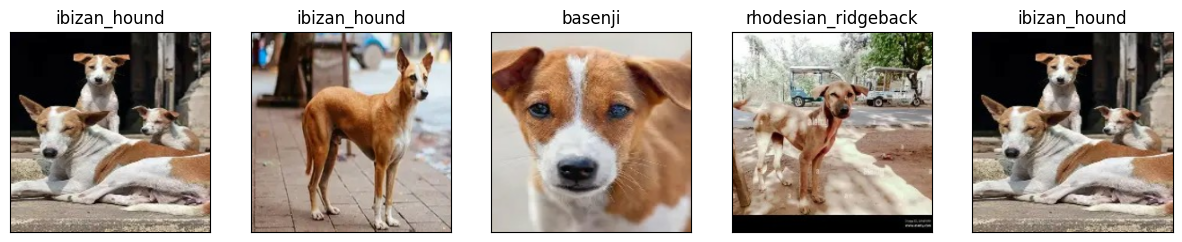

In [464]:
# Check custom image predictions 
plt.figure(figsize=(15, 5))
for i, image in enumerate(custom_images):
    plt.subplot(1, len(custom_images), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)
plt.show()